In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from math import floor,ceil
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv("./german.data",sep=" ",header=None)

headers=["Status of existing checking account","Duration in month","Credit history",\
         "Purpose","Credit amount","Savings account/bonds","Present employment since",\
         "Installment rate in percentage of disposable income","Personal status and sex",\
         "Other debtors / guarantors","Present residence since","Property","Age in years",\
        "Other installment plans","Housing","Number of existing credits at this bank",\
        "Job","Number of people being liable to provide maintenance for","Telephone","Foreign worker","Cost Matrix(Risk)"]
df.columns=headers
df.to_csv("german_data_credit_cat.csv",index=False) #save as csv file

Status_of_existing_checking_account={'A14':"no checking account",'A11':"<0 DM", 'A12': "0 <= <200 DM",'A13':">= 200 DM "}
df["Status of existing checking account"]=df["Status of existing checking account"].map(Status_of_existing_checking_account)

Credit_history={"A34":"critical account","A33":"delay in paying off","A32":"existing credits paid back duly till now","A31":"all credits at this bank paid back duly","A30":"no credits taken"}
df["Credit history"]=df["Credit history"].map(Credit_history)

Purpose={"A40" : "car (new)", "A41" : "car (used)", "A42" : "furniture/equipment", "A43" :"radio/television" , "A44" : "domestic appliances", "A45" : "repairs", "A46" : "education", 'A47' : 'vacation','A48' : 'retraining','A49' : 'business','A410' : 'others'}
df["Purpose"]=df["Purpose"].map(Purpose)

Saving_account={"A65" : "no savings account","A61" :"<100 DM","A62" : "100 <= <500 DM","A63" :"500 <= < 1000 DM", "A64" :">= 1000 DM"}
df["Savings account/bonds"]=df["Savings account/bonds"].map(Saving_account)

Present_employment={'A75':">=7 years", 'A74':"4<= <7 years",  'A73':"1<= < 4 years", 'A72':"<1 years",'A71':"unemployed"}
df["Present employment since"]=df["Present employment since"].map(Present_employment)



Personal_status_and_sex={ 'A95':"female:single",'A94':"male:married/widowed",'A93':"male:single", 'A92':"female:divorced/separated/married", 'A91':"male:divorced/separated"}
df["Personal status and sex"]=df["Personal status and sex"].map(Personal_status_and_sex)


Other_debtors_guarantors={'A101':"none", 'A102':"co-applicant", 'A103':"guarantor"}
df["Other debtors / guarantors"]=df["Other debtors / guarantors"].map(Other_debtors_guarantors)


Property={'A121':"real estate", 'A122':"savings agreement/life insurance", 'A123':"car or other", 'A124':"unknown / no property"}
df["Property"]=df["Property"].map(Property)




Other_installment_plans={'A143':"none", 'A142':"store", 'A141':"bank"}
df["Other installment plans"]=df["Other installment plans"].map(Other_installment_plans)

Housing={'A153':"for free", 'A152':"own", 'A151':"rent"}
df["Housing"]=df["Housing"].map(Housing)




Job={'A174':"management/ highly qualified employee", 'A173':"skilled employee / official", 'A172':"unskilled - resident", 'A171':"unemployed/ unskilled  - non-resident"}
df["Job"]=df["Job"].map(Job)

Telephone={'A192':"yes", 'A191':"none"}
df["Telephone"]=df["Telephone"].map(Telephone)



foreign_worker={'A201':"yes", 'A202':"no"}
df["Foreign worker"]=df["Foreign worker"].map(foreign_worker)



#risk={1:"Good Risk", 2:"Bad Risk"}
#df["Cost Matrix(Risk)"]=df["Cost Matrix(Risk)"].map(risk)

In [3]:
df.head()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,Foreign worker,Cost Matrix(Risk)
0,<0 DM,6,critical account,radio/television,1169,no savings account,>=7 years,4,male:single,none,...,real estate,67,none,own,2,skilled employee / official,1,yes,yes,1
1,0 <= <200 DM,48,existing credits paid back duly till now,radio/television,5951,<100 DM,1<= < 4 years,2,female:divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee / official,1,none,yes,2
2,no checking account,12,critical account,education,2096,<100 DM,4<= <7 years,2,male:single,none,...,real estate,49,none,own,1,unskilled - resident,2,none,yes,1
3,<0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,<100 DM,4<= <7 years,2,male:single,guarantor,...,savings agreement/life insurance,45,none,for free,1,skilled employee / official,2,none,yes,1
4,<0 DM,24,delay in paying off,car (new),4870,<100 DM,1<= < 4 years,3,male:single,none,...,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Status of existing checking account                       1000 non-null   object
 1   Duration in month                                         1000 non-null   int64 
 2   Credit history                                            1000 non-null   object
 3   Purpose                                                   1000 non-null   object
 4   Credit amount                                             1000 non-null   int64 
 5   Savings account/bonds                                     1000 non-null   object
 6   Present employment since                                  1000 non-null   object
 7   Installment rate in percentage of disposable income       1000 non-null   int64 
 8   Personal status and sex      

In [5]:
df.isna().any().any()

False

In [6]:
df.isna().any()

Status of existing checking account                         False
Duration in month                                           False
Credit history                                              False
Purpose                                                     False
Credit amount                                               False
Savings account/bonds                                       False
Present employment since                                    False
Installment rate in percentage of disposable income         False
Personal status and sex                                     False
Other debtors / guarantors                                  False
Present residence since                                     False
Property                                                    False
Age in years                                                False
Other installment plans                                     False
Housing                                                     False
Number of 

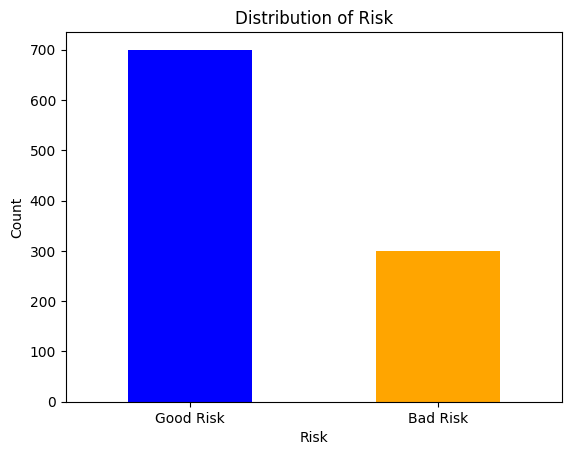

In [25]:
cost_matrix_plot = df['Cost Matrix(Risk)'].value_counts().plot(kind="bar", color=["blue", "orange"], rot=0)
plt.xticks(ticks=[0, 1], labels=["Good Risk", "Bad Risk"])

plt.xlabel("Risk")
plt.ylabel("Count")
plt.title("Distribution of Risk")
plt.show()

/tmp/ipykernel_65270/2309861062.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( df['Credit amount'], kde = False )


Text(0, 0.5, 'Frequency')

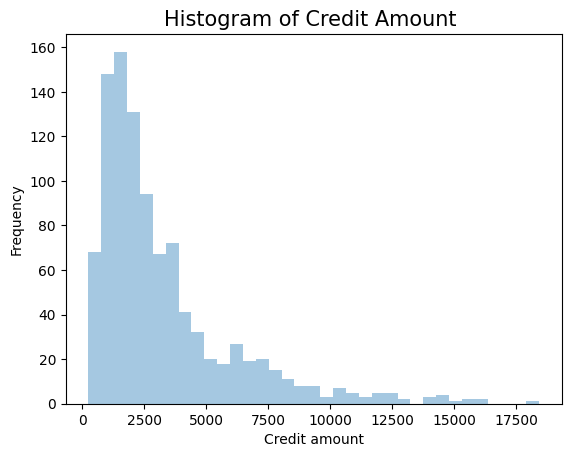

In [8]:
sns.distplot( df['Credit amount'], kde = False )
plt.title( "Histogram of Credit Amount ", fontsize = 15)
plt.ylabel( "Frequency")

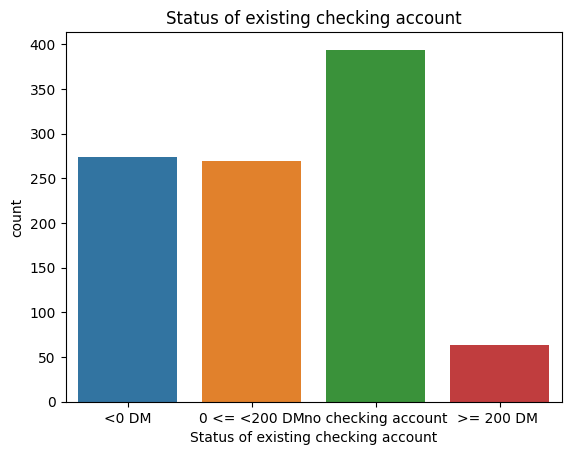

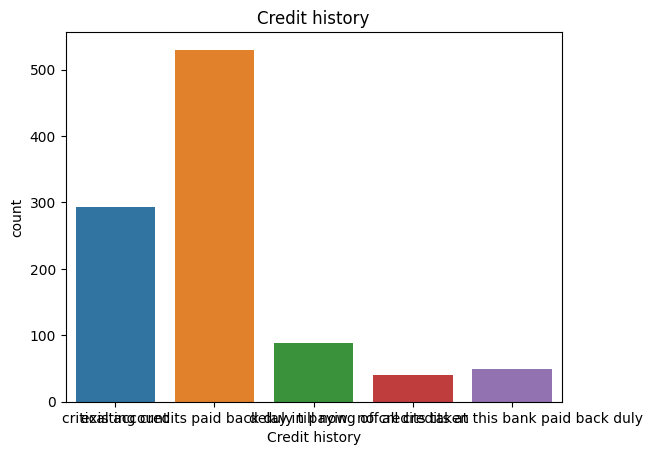

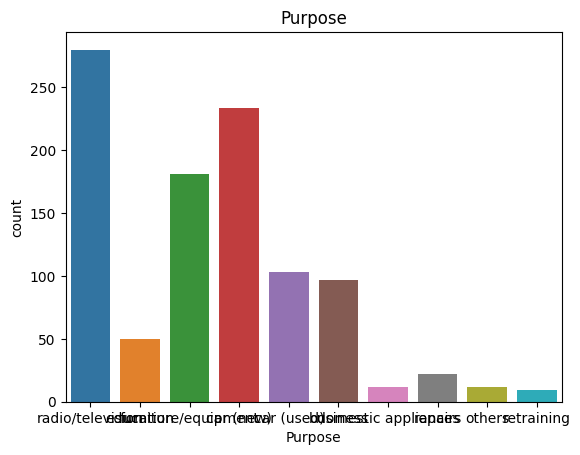

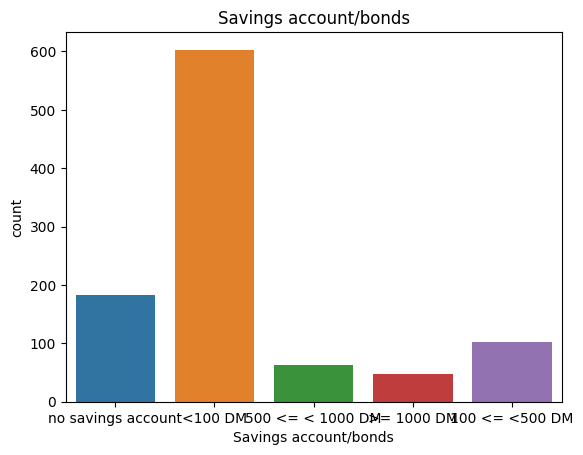

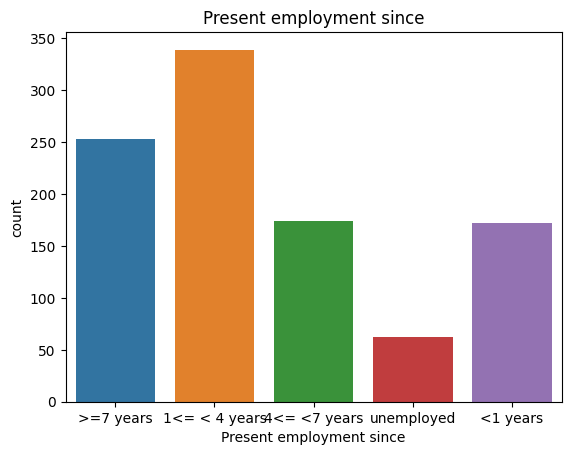

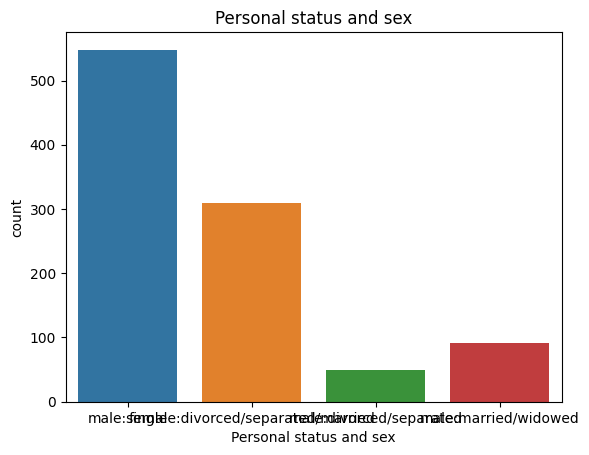

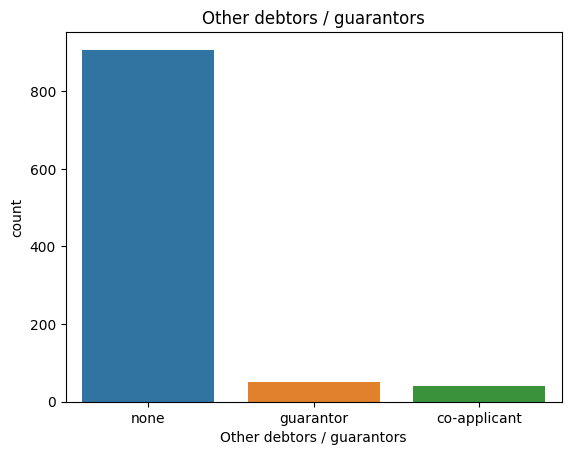

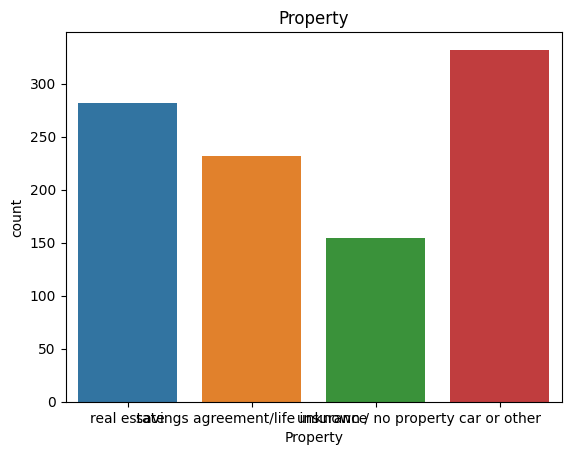

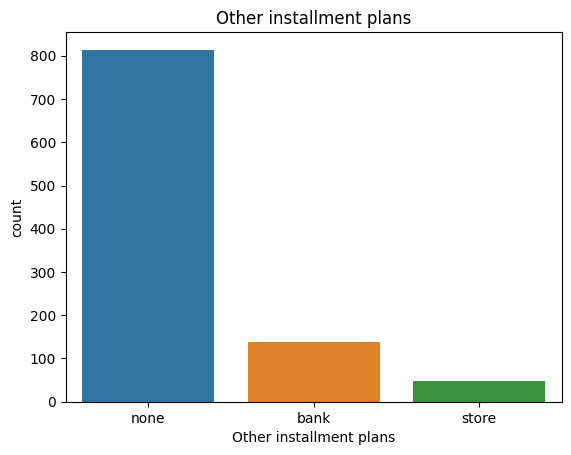

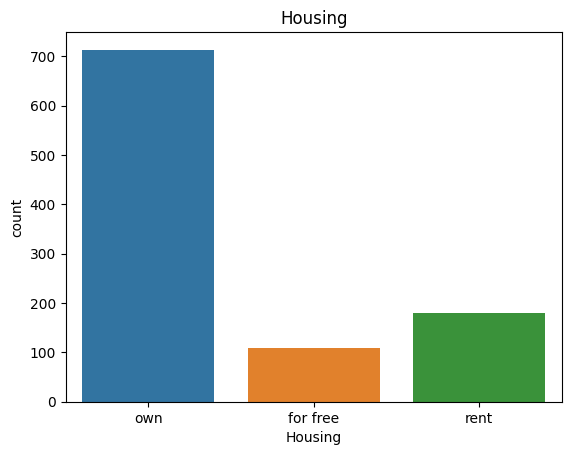

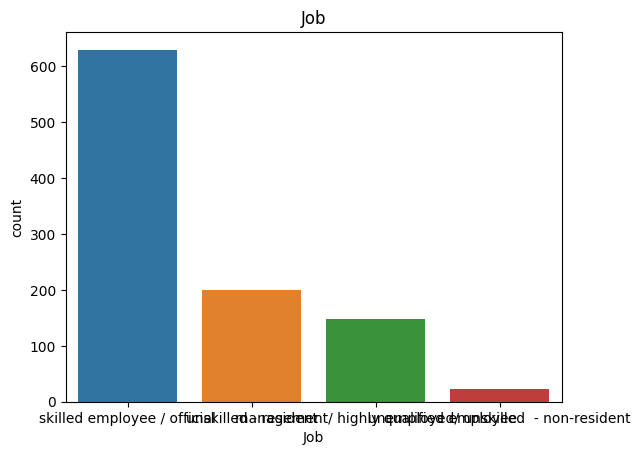

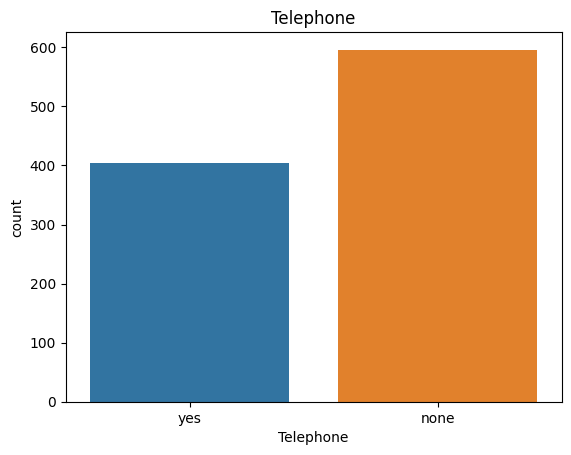

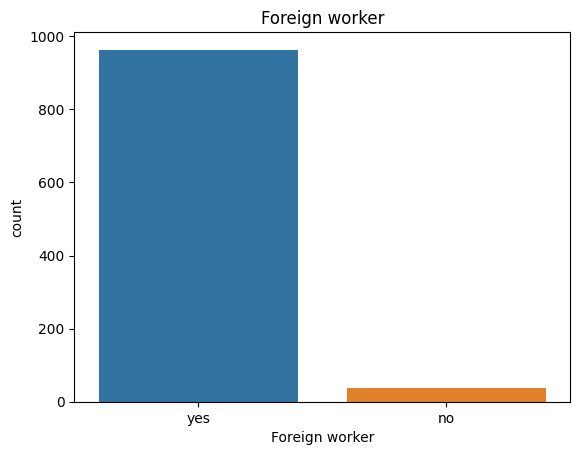

In [9]:
obj_attr = df.dtypes[df.dtypes == 'object'].index
obj_attr
for i in obj_attr:
    plt.figure()
    plt.title(i)
    sns.countplot(x=df[i])
    plt.show()

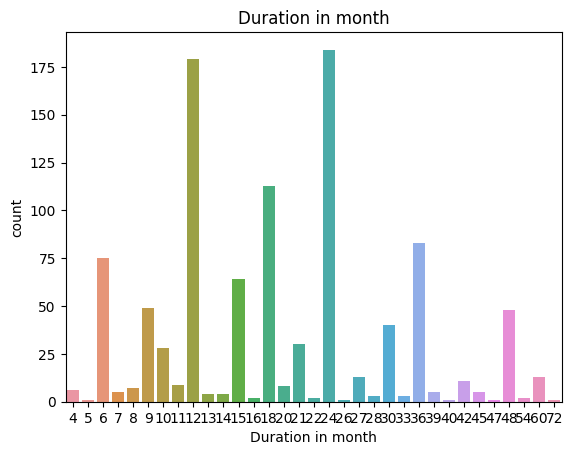

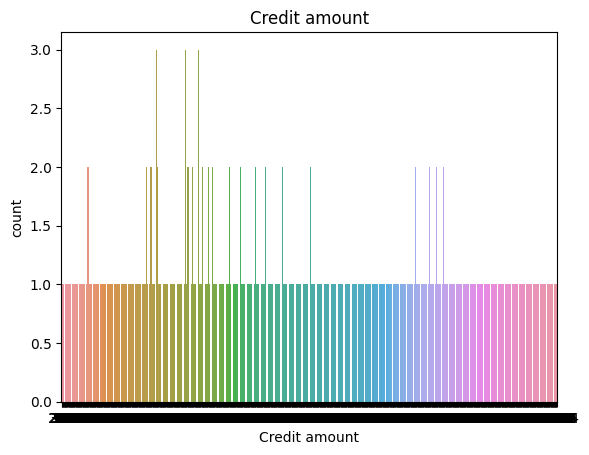

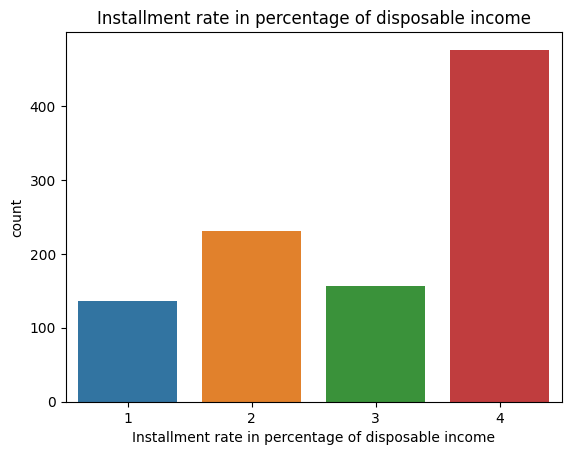

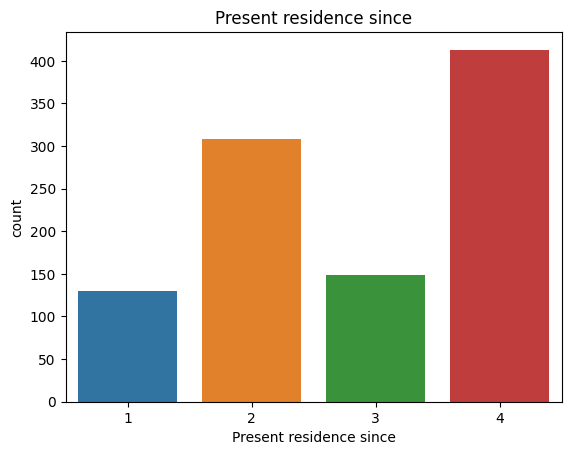

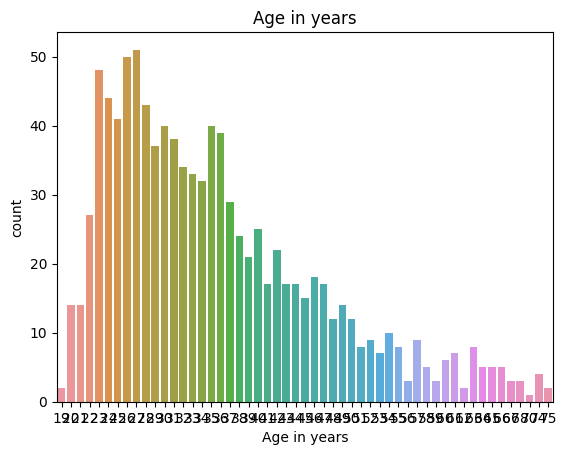

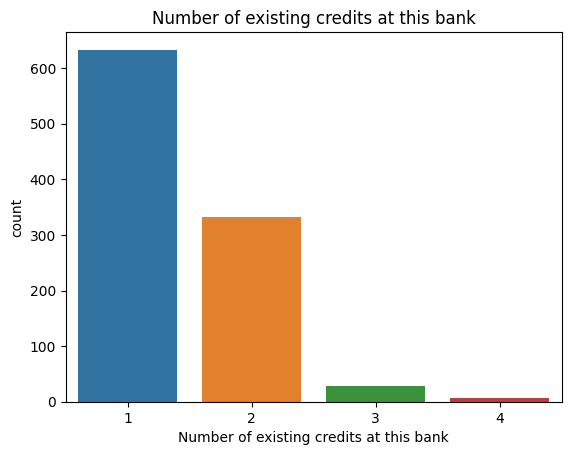

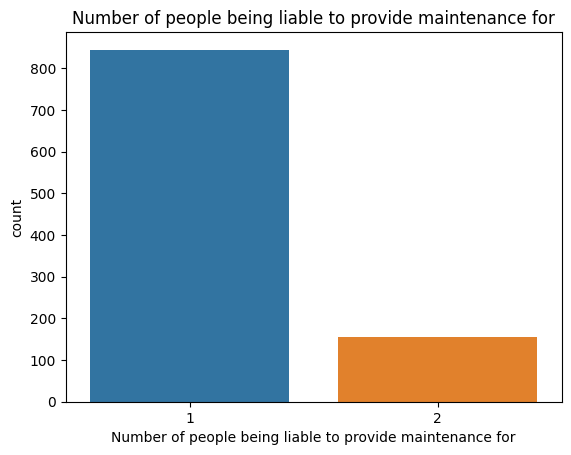

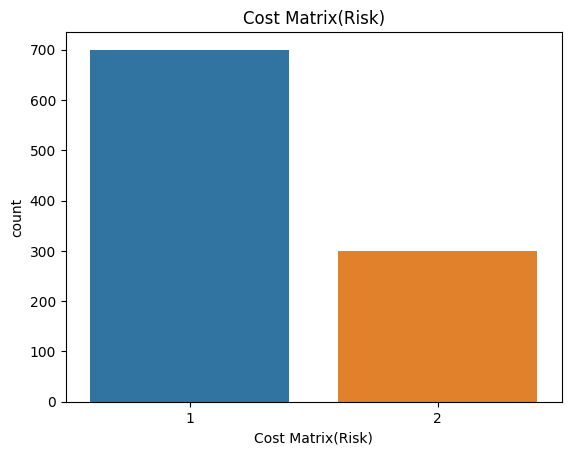

In [10]:
obj_attr = df.dtypes[df.dtypes == 'int64'].index
obj_attr
for i in obj_attr:
    plt.figure()
    plt.title(i)
    sns.countplot(x=df[i])
    plt.show()

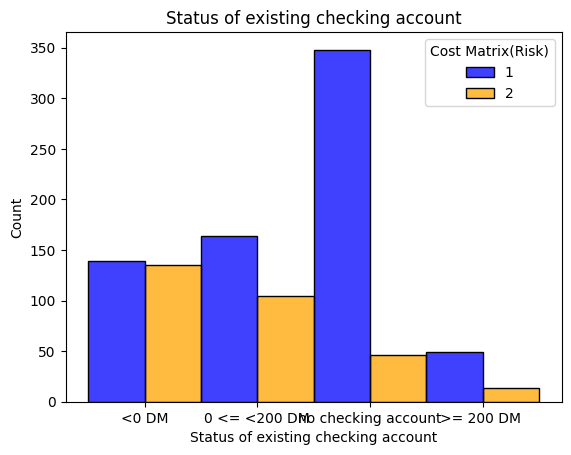

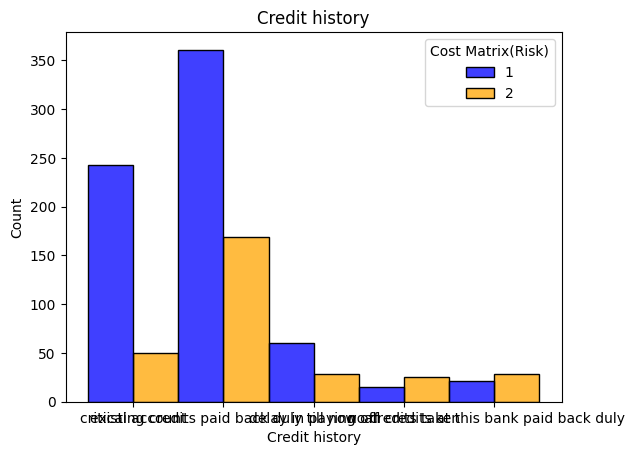

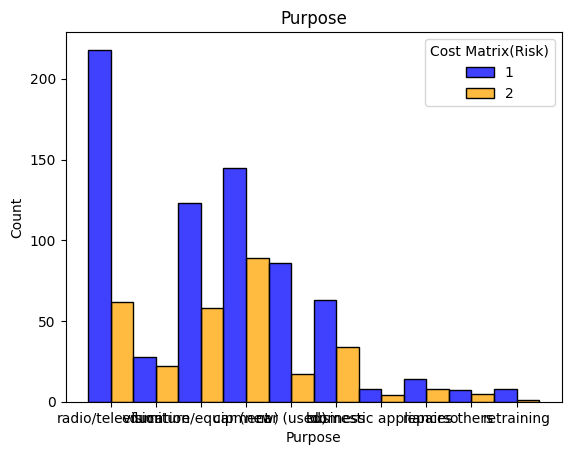

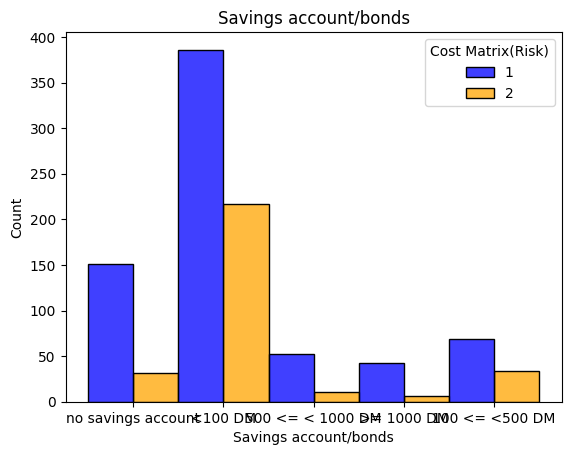

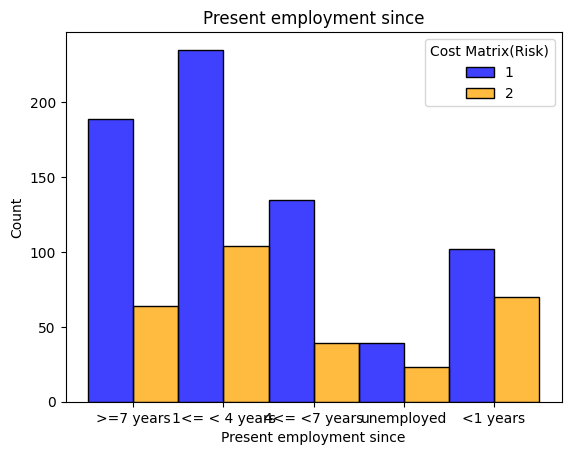

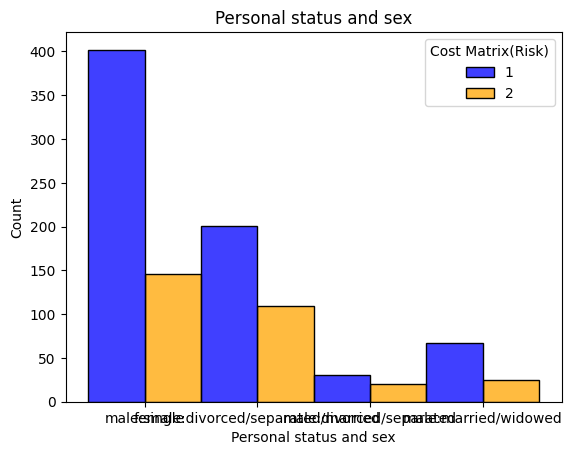

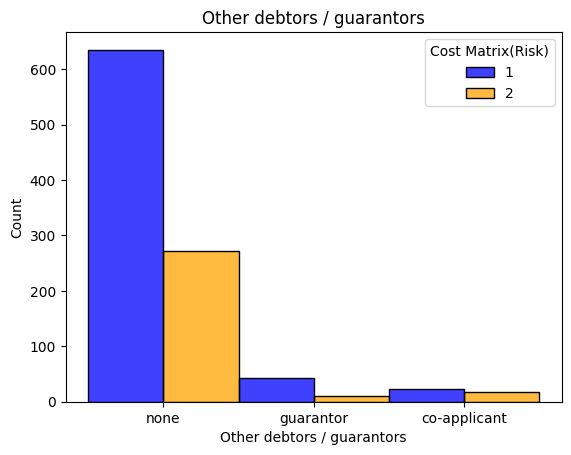

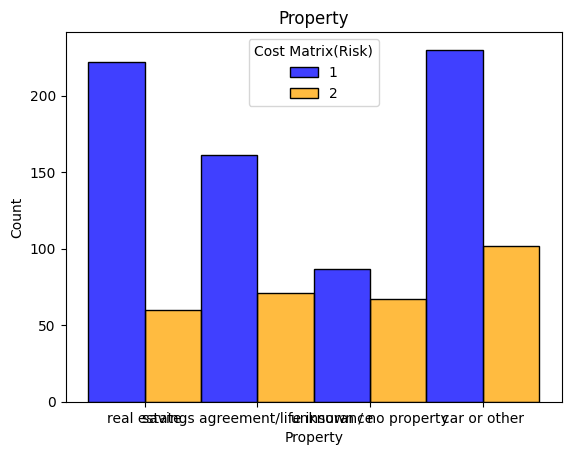

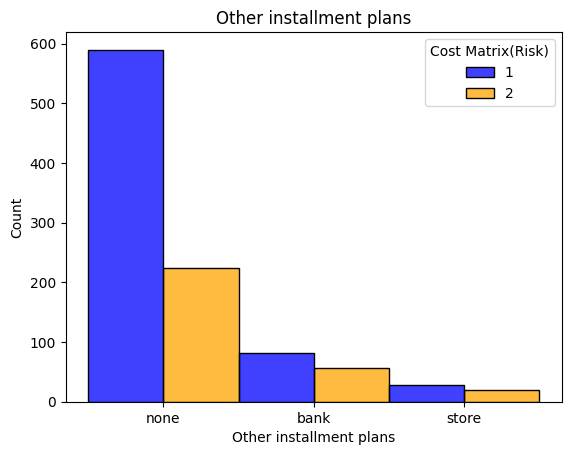

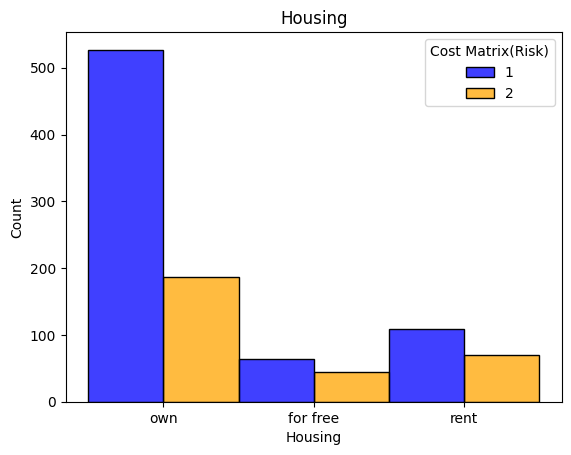

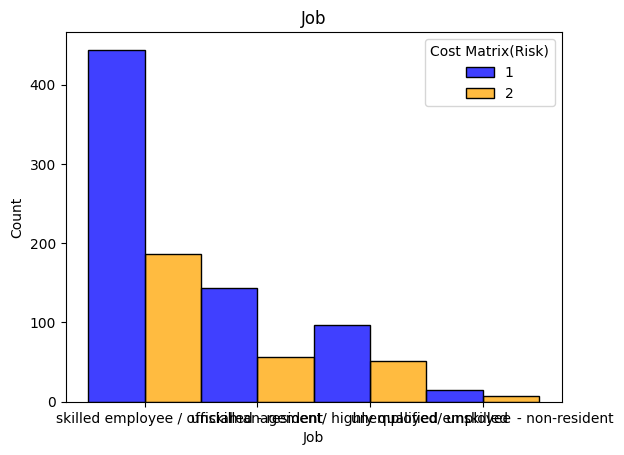

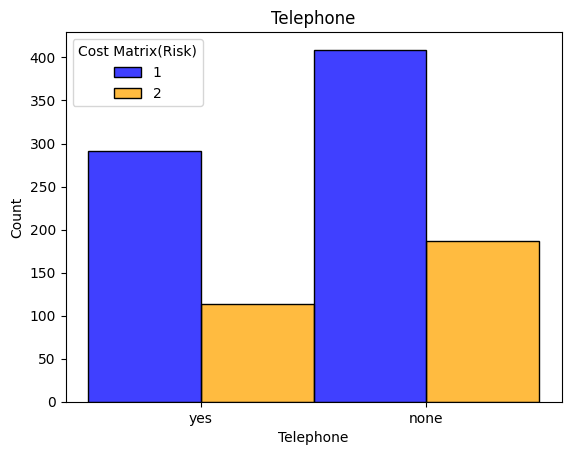

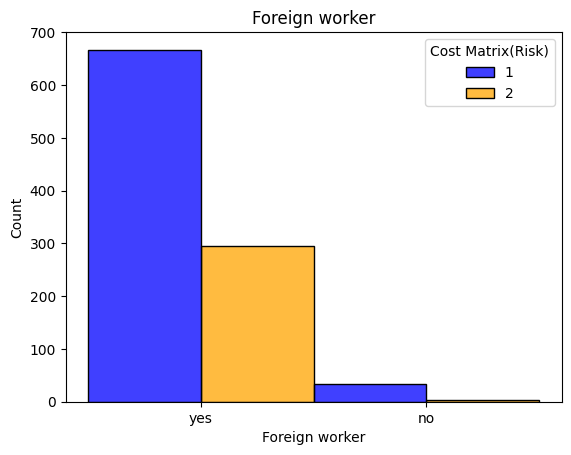

In [11]:
custom_palette = ['blue', 'orange']

    
obj_attr = df.dtypes[df.dtypes == 'object'].index
for i in obj_attr:
    plt.figure()
    plt.title(i)
    sns.histplot(data=df , x=df[i],hue='Cost Matrix(Risk)', multiple="dodge", bins=5, palette=custom_palette)
    plt.show()
    

In [12]:
def visualize_distribution(attr):
    good_risk_df = df[df["Cost Matrix(Risk)"]==1]
    bad_risk_df = df[df["Cost Matrix(Risk)"]==2]
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    attr_good_risk_df = good_risk_df[[attr, 'Cost Matrix(Risk)']].groupby(attr).count()
    attr_bad_risk_df = bad_risk_df[[attr, 'Cost Matrix(Risk)']].groupby(attr).count()
    ax[0].barh( attr_good_risk_df['Cost Matrix(Risk)'].index.tolist(), attr_good_risk_df['Cost Matrix(Risk)'].tolist(), align='center', color="#5975A4")
    ax[1].barh( attr_bad_risk_df['Cost Matrix(Risk)'].index.tolist(), attr_bad_risk_df['Cost Matrix(Risk)'].tolist(), align='center', color="#B55D60")
    ax[0].set_title('Good Risk')
    ax[1].set_title('Bad Risk')
    ax[0].invert_xaxis()
    ax[1].yaxis.tick_right()
    
    num_para_change=["Present residence since","Number of existing credits at this bank","Installment rate in percentage of disposable income","Number of people being liable to provide maintenance for"]
    if attr in num_para_change:
        for i, v in enumerate(attr_good_risk_df['Cost Matrix(Risk)'].tolist()):
            ax[0].text(v+15, i+1, str(v), color='black')
        for i, v in enumerate(attr_bad_risk_df['Cost Matrix(Risk)'].tolist()):
            ax[1].text(v+2, i+1, str(v), color='black')
    else:
        for i, v in enumerate(attr_good_risk_df['Cost Matrix(Risk)'].tolist()):
            ax[0].text(v+25, i + .05, str(v), color='black')
        for i, v in enumerate(attr_bad_risk_df['Cost Matrix(Risk)'].tolist()):
            ax[1].text(v+1, i + .05, str(v), color='black')
    plt.suptitle(attr)
    plt.tight_layout()
    plt.show()

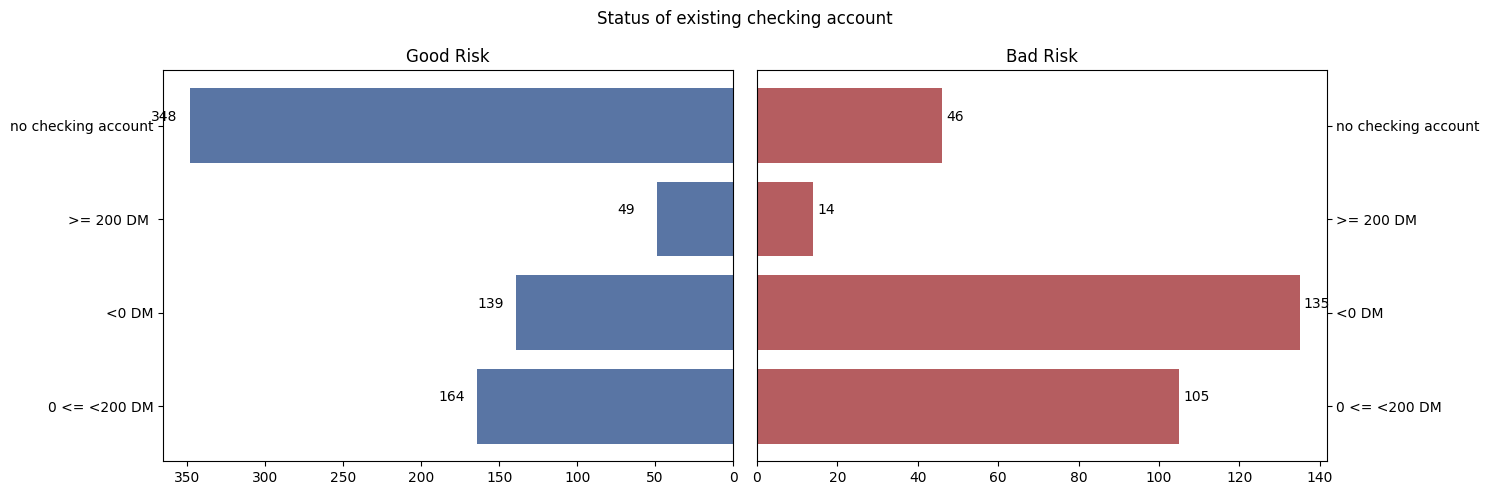

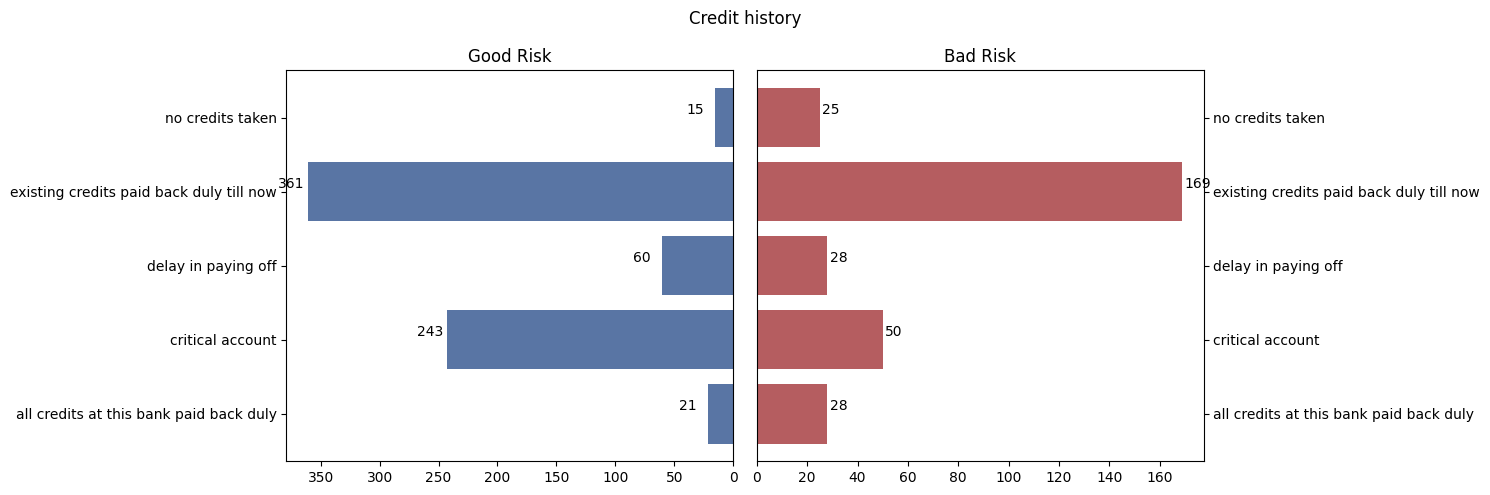

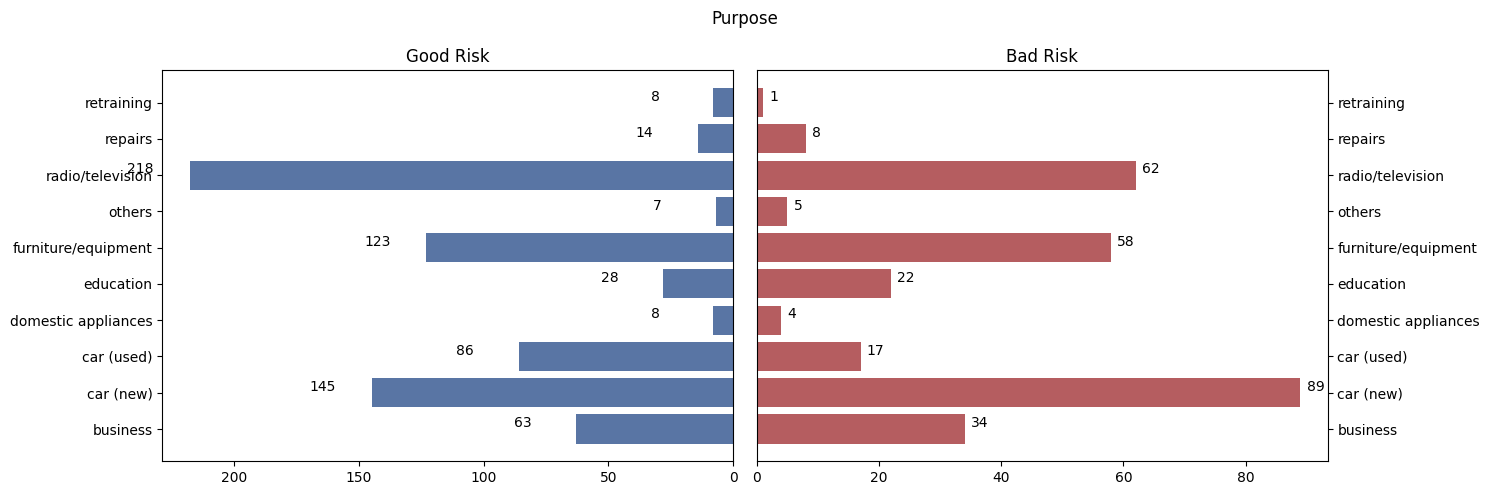

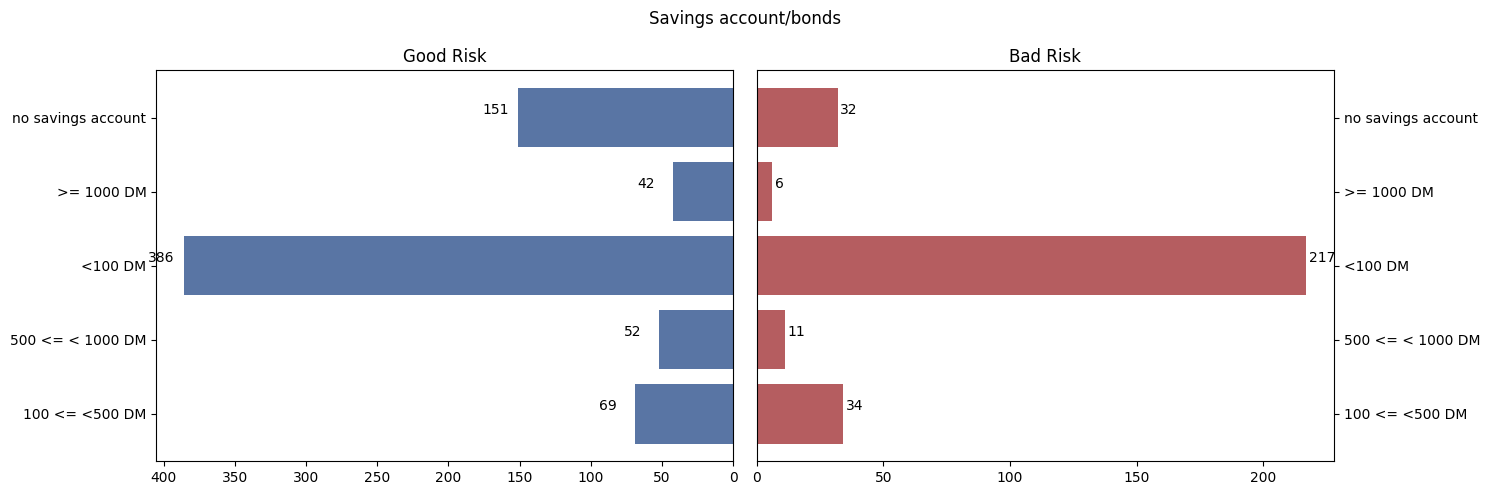

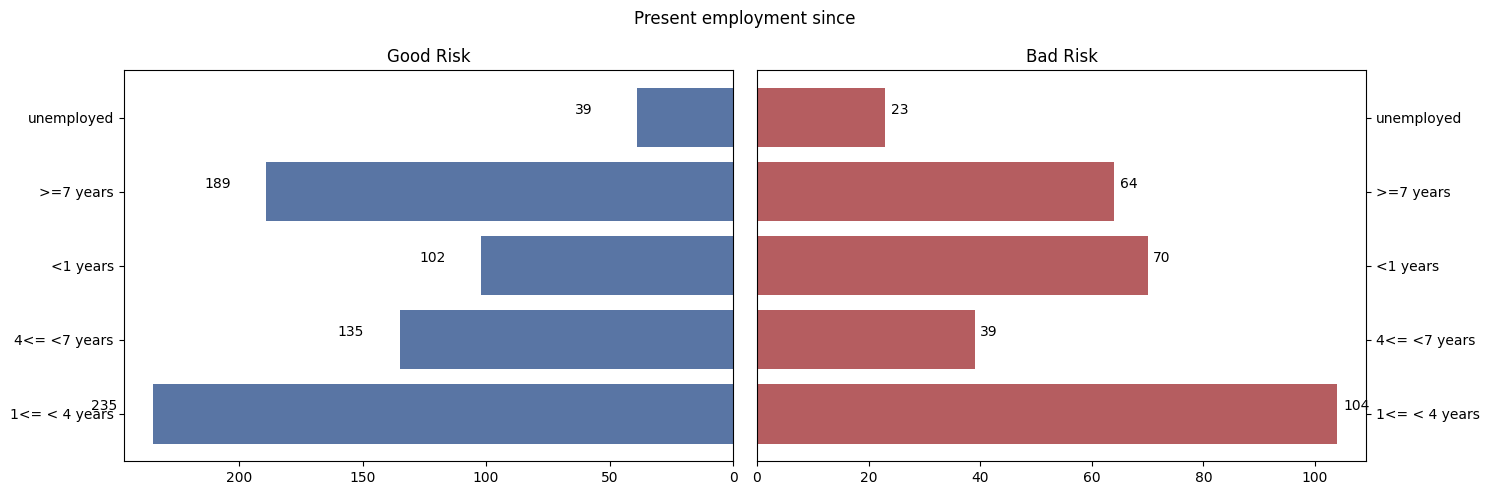

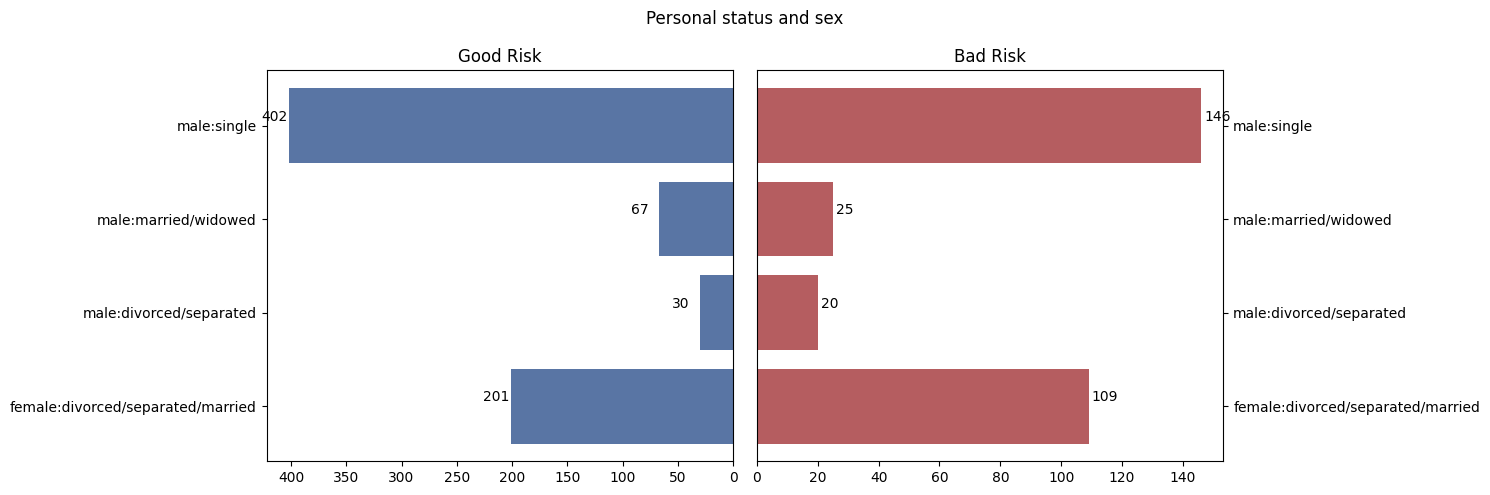

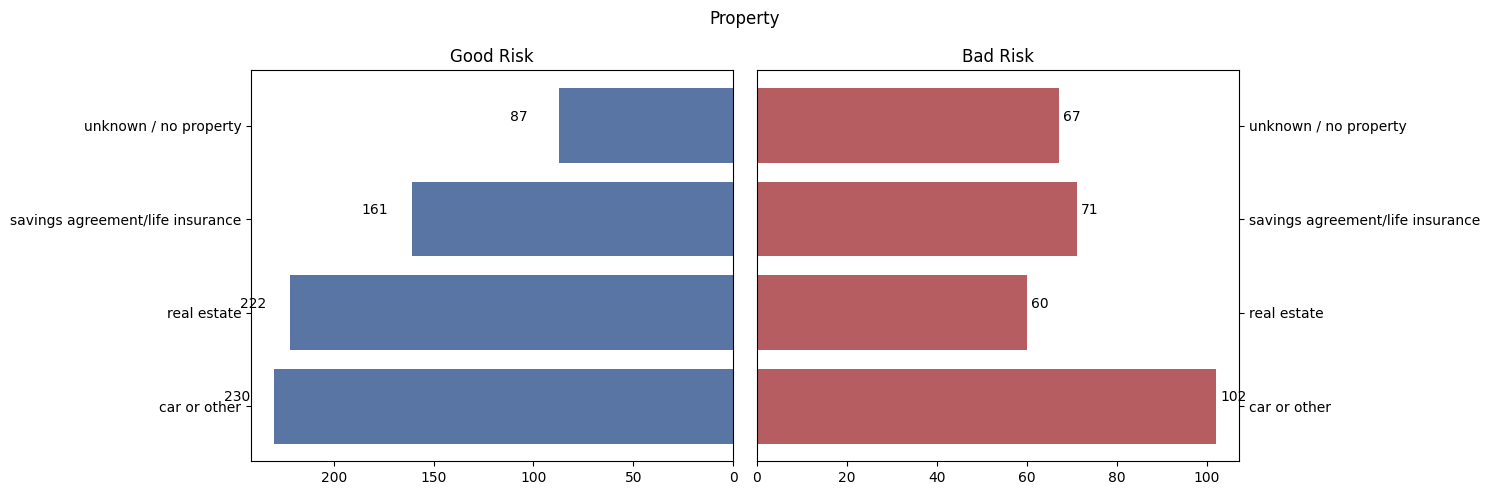

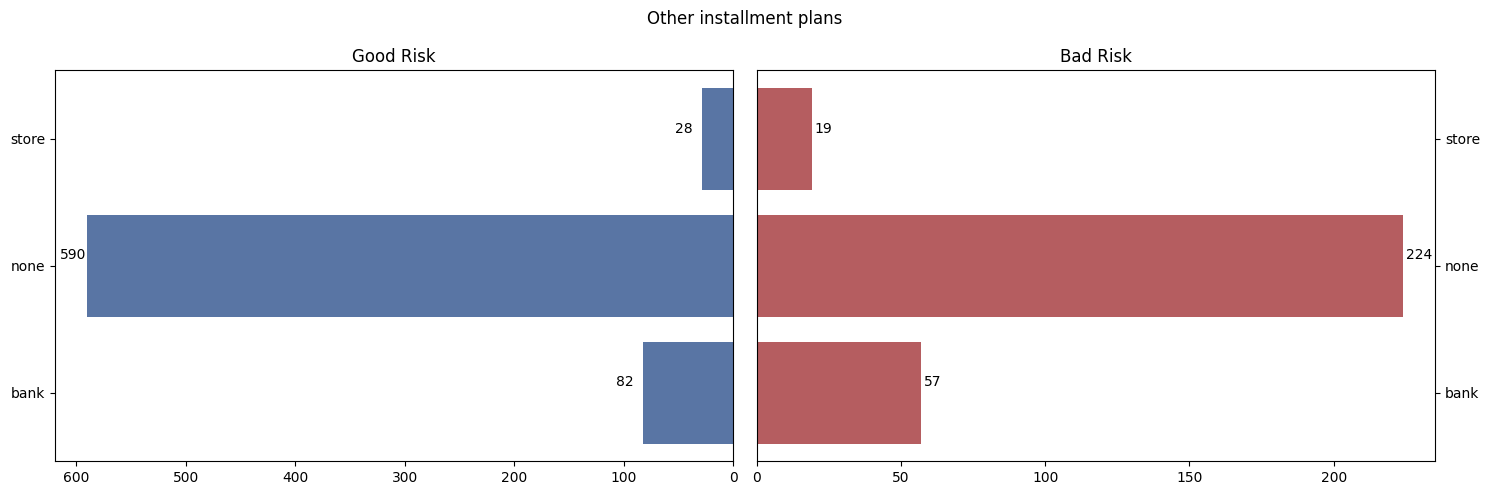

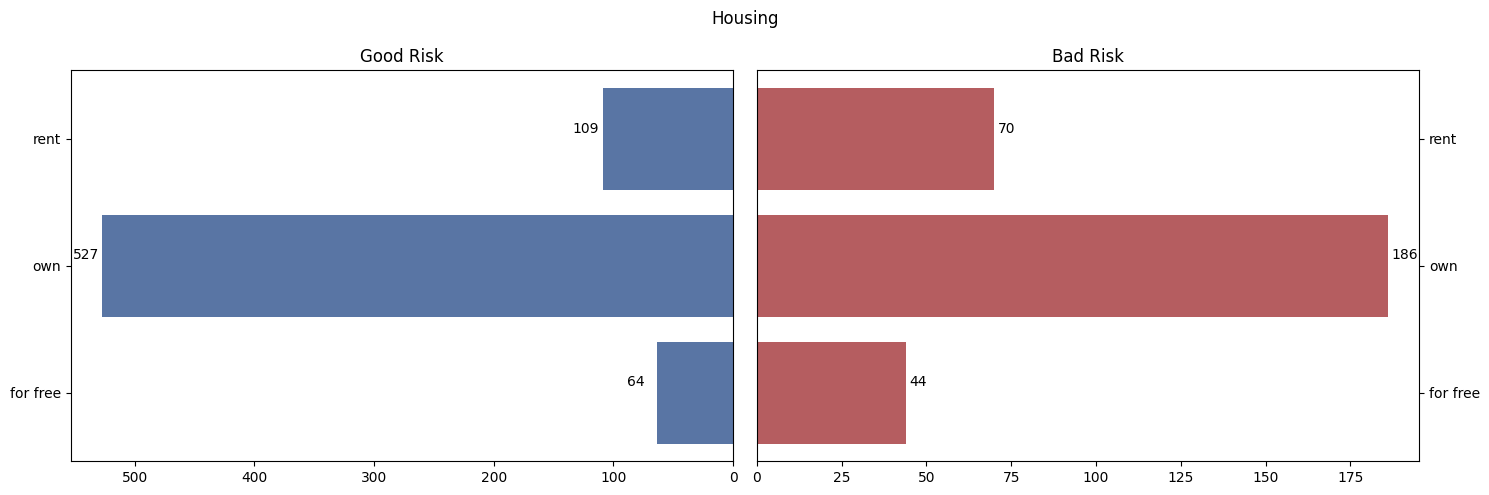

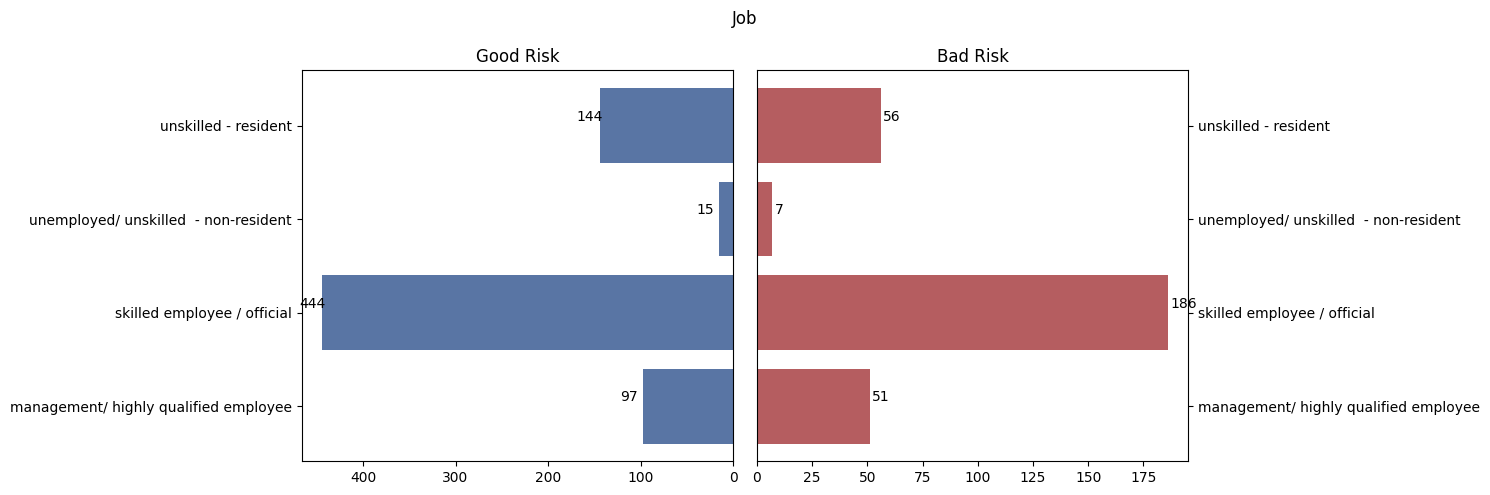

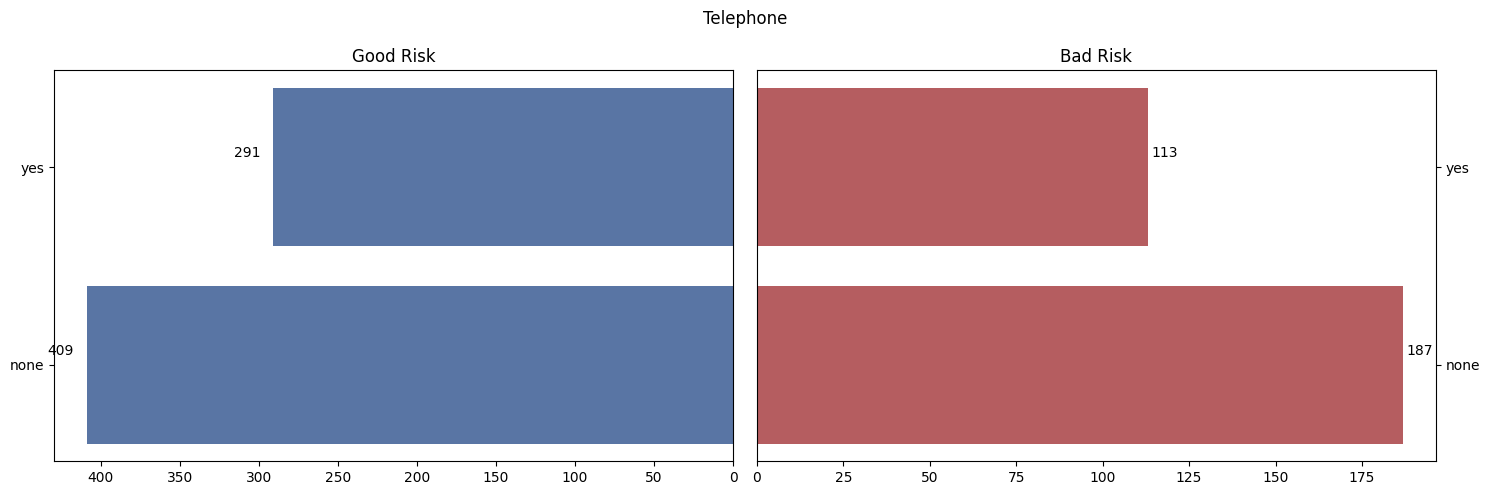

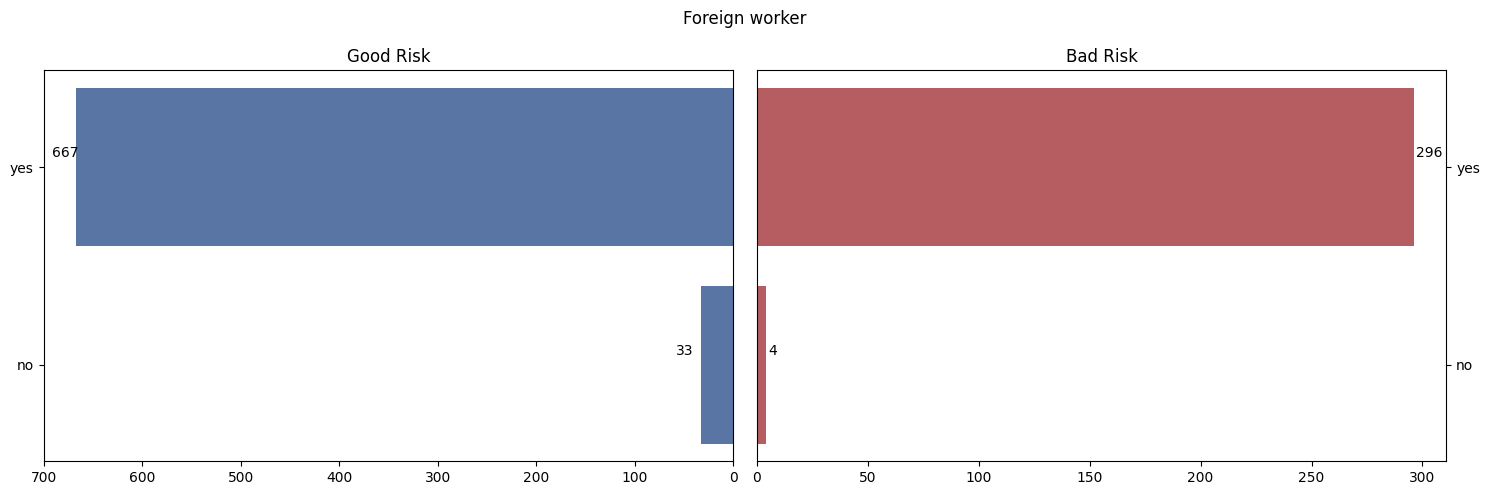

In [18]:
visualize_distribution("Status of existing checking account")
visualize_distribution("Credit history")
visualize_distribution("Purpose")
visualize_distribution("Savings account/bonds")
visualize_distribution("Present employment since")
visualize_distribution("Personal status and sex")
#visualize_distribution("Other debtors / guarantor")
visualize_distribution("Property")
visualize_distribution("Other installment plans")
visualize_distribution("Housing")
visualize_distribution("Job")
visualize_distribution("Telephone")
visualize_distribution("Foreign worker")

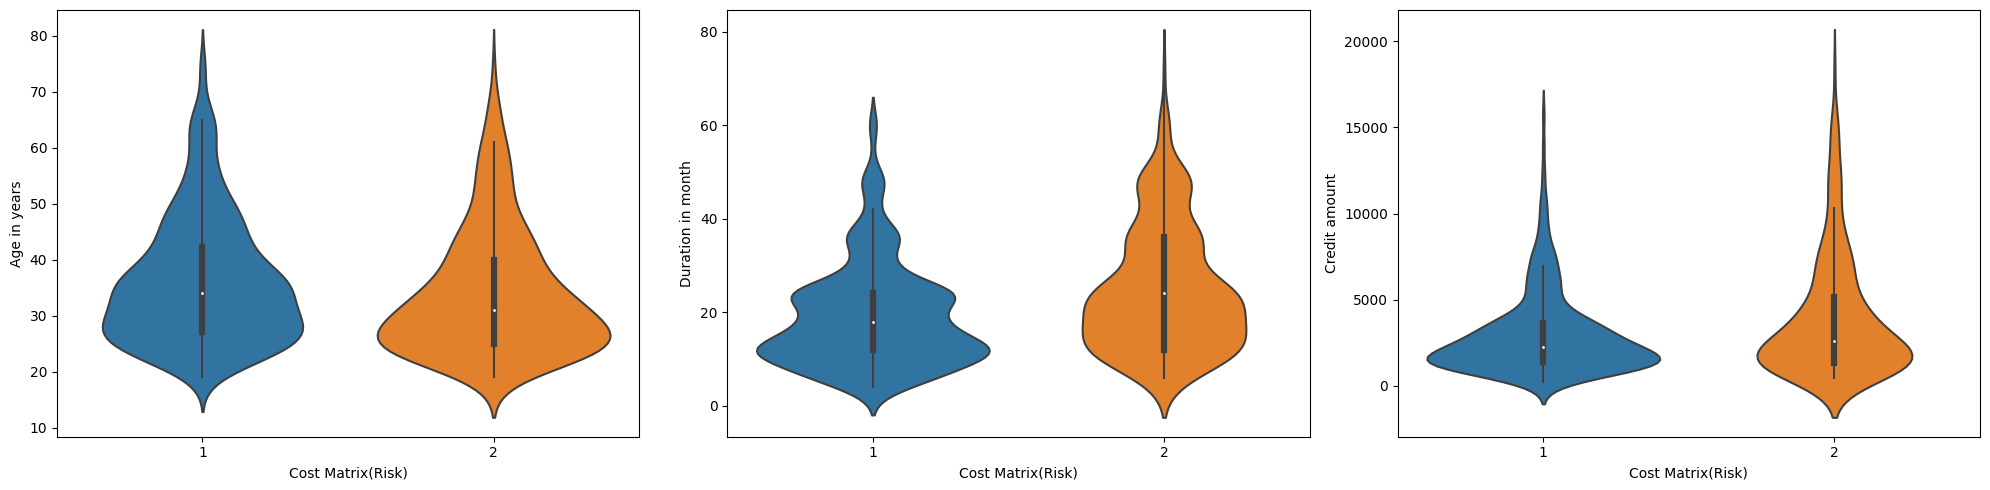

In [19]:

continuous_variables = ['Age in years', 'Duration in month', 'Credit amount']
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

for var, subplot in zip(continuous_variables, axs.flatten()):
    sns.violinplot(x=df['Cost Matrix(Risk)'], y=df[var], ax=subplot)

plt.tight_layout()
plt.show()


In [22]:
from sklearn.preprocessing import LabelEncoder


label_encoders = {}  # Rečnik za čuvanje label encodera
categorical_columns = ["Status of existing checking account", "Credit history", "Purpose", "Savings account/bonds", "Present employment since",
                       "Personal status and sex", "Other debtors / guarantors", "Property", "Other installment plans",
                       "Housing", "Job", "Telephone", "Foreign worker"]

# Iterirajte kroz svaku kategoričku kolonu i primena LabelEncoder
for column in categorical_columns:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])  # Enkodiranje kolone u DataFrame-u
    label_encoders[column] = label_encoder  # Sačuvajte label encoder u rečnik


In [23]:
df.corr()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,Foreign worker,Cost Matrix(Risk)
Status of existing checking account,1.000000,-0.096005,-0.110683,0.037778,-0.092638,0.097452,-0.030032,0.029780,0.049073,0.084286,...,-0.072668,0.083636,0.052184,-0.012511,0.084513,-0.029085,0.030417,0.037208,-0.014658,-0.302406
Duration in month,-0.096005,1.000000,0.029430,-0.090871,0.624984,0.020843,0.003824,0.074749,0.099678,-0.006711,...,0.068883,-0.036136,0.003559,-0.157049,-0.011284,-0.215438,-0.023834,0.164718,0.138196,0.214927
Credit history,-0.110683,0.029430,1.000000,0.038899,0.029050,-0.031958,-0.088158,-0.059779,-0.080282,0.011296,...,-0.050757,-0.157261,0.040499,0.084026,-0.387820,-0.013921,-0.070008,-0.039237,0.000513,0.097054
Purpose,0.037778,-0.090871,0.038899,1.000000,-0.172932,0.010877,-0.007323,0.125824,-0.061256,-0.082175,...,-0.071401,-0.075574,0.045430,0.024404,-0.060580,0.036013,-0.101484,-0.104555,0.076367,-0.089096
Credit amount,-0.092638,0.624984,0.029050,-0.172932,1.000000,0.070127,0.038756,-0.271316,0.114810,-0.037921,...,0.122226,0.032716,-0.020224,-0.135632,0.020795,-0.261139,0.017142,0.276995,0.050050,0.154739
Savings account/bonds,0.097452,0.020843,-0.031958,0.010877,0.070127,1.000000,0.056865,0.032940,0.035129,0.031213,...,0.044615,0.094760,0.000726,-0.032711,0.015568,-0.040662,0.023693,0.075988,-0.012566,-0.103133
Present employment since,-0.030032,0.003824,-0.088158,-0.007323,0.038756,0.056865,1.000000,0.074664,0.048533,0.007275,...,0.151337,0.289741,-0.052460,-0.126529,0.085495,-0.142279,0.028019,0.110568,0.064760,0.008932
Installment rate in percentage of disposable income,0.029780,0.074749,-0.059779,0.125824,-0.271316,0.032940,0.074664,1.000000,0.118367,0.014835,...,0.014777,0.058266,0.041423,-0.089405,0.021669,-0.078090,-0.071207,0.014413,0.090024,0.072404
Personal status and sex,0.049073,0.099678,-0.080282,-0.061256,0.114810,0.035129,0.048533,0.118367,1.000000,-0.022214,...,0.087786,0.177153,0.006637,-0.245949,0.112438,-0.040375,0.253574,0.078919,-0.049099,-0.089535
Other debtors / guarantors,0.084286,-0.006711,0.011296,-0.082175,-0.037921,0.031213,0.007275,0.014835,-0.022214,1.000000,...,-0.057175,0.028294,0.051581,-0.061302,0.017662,-0.014927,0.010990,0.050996,0.107639,-0.028441


Text(0.5, 1.0, 'Matrica korelacije')

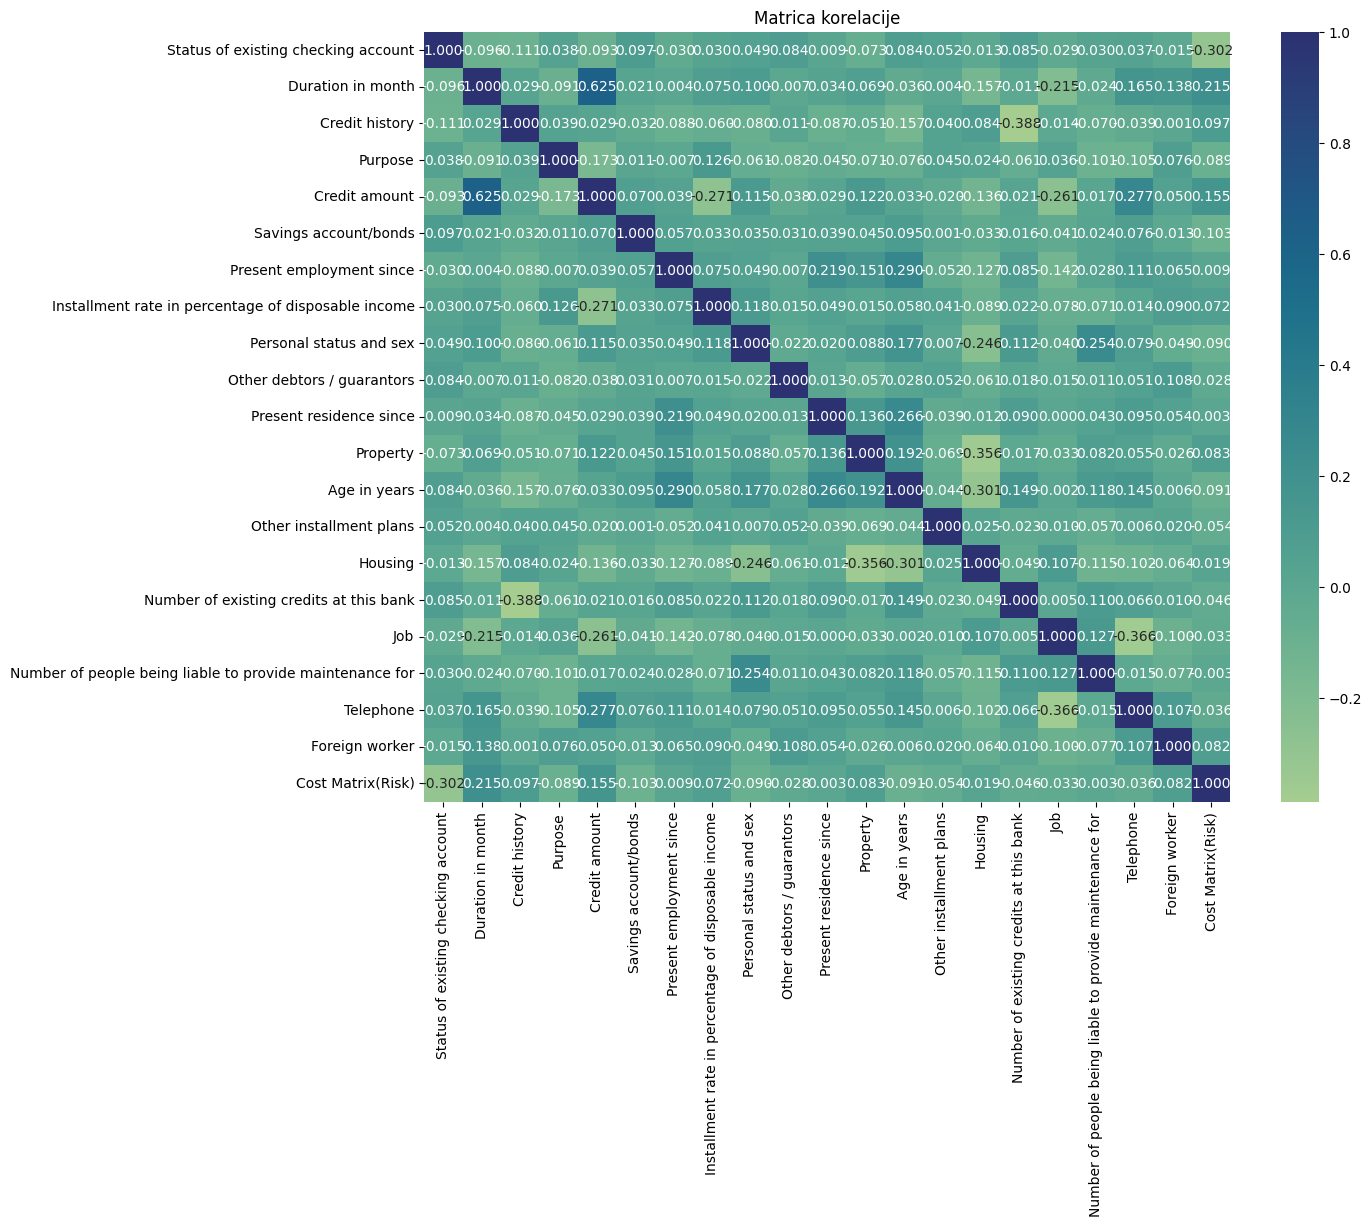

In [24]:
plt.figure(figsize=(13,10))

sns.heatmap(df.corr(), annot=True,  cmap="crest", fmt='.3f',linecolor='yellow')
plt.title('Matrica korelacije')